In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Loading the Data

In [2]:
os.listdir('data')

['test', 'malaria_cell_classification_code', 'train']

In [3]:
test_path = 'data/test'
train_path = 'data/train'

In [4]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [5]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [6]:
os.listdir(train_path+'/parasitized')[0]

'C182P143NThinF_IMG_20151201_172842_cell_23.png'

In [7]:
para_cell = train_path+'/parasitized/C182P143NThinF_IMG_20151201_172842_cell_23.png'

In [8]:
para_cell

'data/train/parasitized/C182P143NThinF_IMG_20151201_172842_cell_23.png'

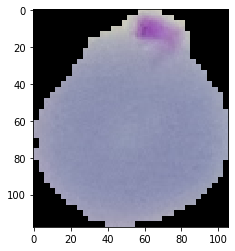

In [9]:
plt.imshow(imread(para_cell))

In [10]:
os.listdir(train_path+'/uninfected')[0]

'C77P38ThinF_IMG_20150602_143524_cell_78.png'

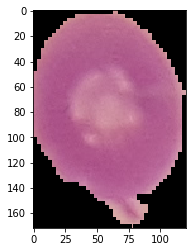

In [11]:
uni_cell = train_path+'/uninfected/C77P38ThinF_IMG_20150602_143524_cell_78.png'
plt.imshow(imread(uni_cell))

In [12]:
imread(para_cell).max()

0.8156863

In [13]:
print(len(os.listdir(train_path+'/parasitized')))
print(len(os.listdir(train_path+'/uninfected')))

12479
12479


In [14]:
print(len(os.listdir(test_path+'/parasitized')))
print(len(os.listdir(test_path+'/uninfected')))

1300
1300


In [15]:
dim_1 = []
dim_2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected/'+image_filename)
    d1, d2, colors = img.shape
    dim_1.append(d1)
    dim_2.append(d2)

In [16]:
np.array(dim_1).mean()

130.92538461538462

In [17]:
np.array(dim_2).mean()

130.75

In [18]:
image_shape = (130, 130, 3)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

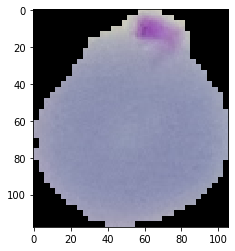

In [21]:
parat_cell = imread(para_cell)
plt.imshow(parat_cell)

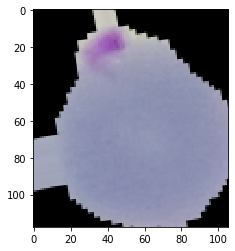

In [22]:
plt.imshow(image_gen.random_transform(parat_cell))

In [23]:
batch_size = 16
train_img_gen = image_gen.flow_from_directory(train_path,
                                              target_size=image_shape[:2], 
                                              class_mode='binary', 
                                              batch_size=batch_size)

test_img_gen = image_gen.flow_from_directory(test_path, 
                                             target_size=image_shape[:2], 
                                             class_mode='binary', 
                                             batch_size=batch_size,
                                             shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [24]:
print(train_img_gen.class_indices)
print(test_img_gen.class_indices)

{'parasitized': 0, 'uninfected': 1}
{'parasitized': 0, 'uninfected': 1}


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [26]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [ ]:
r = model.fit(train_img_gen,
              epochs=20,
              validation_data=test_img_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
1560/1560 [==============================] - 1545s 990ms/step - loss: 1.0566 - accuracy: 0.5528 - val_loss: 0.6799 - val_accuracy: 0.5827
Epoch 2/20
1560/1560 [==============================] - 1557s 998ms/step - loss: 0.6825 - accuracy: 0.5780 - val_loss: 0.6736 - val_accuracy: 0.5915
Epoch 3/20
1560/1560 [==============================] - 1556s 998ms/step - loss: 0.6725 - accuracy: 0.5979 - val_loss: 0.6586 - val_accuracy: 0.6065
Epoch 4/20
1560/1560 [==============================] - 1544s 990ms/step - loss: 0.6712 - accuracy: 0.5950 - val_loss: 0.6640 - val_accuracy: 0.5977
Epoch 5/20
1560/1560 [==============================] - 1551s 994ms/step - loss: 0.6780 - accuracy: 0.6023 - val_loss: 0.6660 - val_accuracy: 0.6035
Epoch 6/20
1560/1560 [==============================] - 1547s 992ms/step - loss: 0.6162 - accuracy: 0.6533 - val_loss: 0.3378 - val_accuracy: 0.8827
Epoch 7/20


In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [92]:
evaluation = model.evaluate(test_img_gen)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

  ...
    to  
  ['...']
163/163 [==============================] - 53s 326ms/step - loss: 0.1739 - accuracy: 0.9446
Test Accuracy : 94.46%


In [93]:
evaluation = model.evaluate(train_img_gen)
print(f'Train Accuracy : {evaluation[1] * 100:.2f}%')

  ...
    to  
  ['...']
1560/1560 [==============================] - 561s 360ms/step - loss: 0.1623 - accuracy: 0.9502
Train Accuracy : 95.02%


In [86]:
from tensorflow.keras.models import load_model

model.save('cnn_20_epochs.h5')

In [98]:
pred = model.predict_generator(test_img_gen)

In [99]:
pred > 0.5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [100]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

pd.DataFrame(classification_report(test_img_gen.classes, pred > 0.5, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.948916,0.943425,0.946154,0.946171,0.946171
recall,0.943077,0.949231,0.946154,0.946154,0.946154
f1-score,0.945988,0.946319,0.946154,0.946153,0.946153
support,1300.000000,1300.000000,0.946154,2600.000000,2600.000000


In [102]:
confusion_matrix(test_img_gen.classes, pred > 0.5)

array([[1226,   74],
       [  66, 1234]])

In [97]:
pd.DataFrame(r.history).to_csv('history.csv', index=False)